In [1]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense



In [3]:
classifier=Sequential()

W0719 17:33:25.753886  8372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [4]:
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.
W0719 17:33:26.906625  8372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 17:33:27.119324  8372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

W0719 17:33:27.305836  8372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [6]:
classifier.add(Convolution2D(32,3,3,activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [7]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
#flatten
classifier.add(Flatten())


In [9]:
#full_connection
classifier.add(Dense(output_dim=128,activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  


In [10]:
#full_connection
classifier.add(Dense(output_dim=1,activation='sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [11]:
#compilling the cnn
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

W0719 17:33:30.029424  8372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 17:33:30.078409  8372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0719 17:33:30.128408  8372 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
#fitting the images to algo(CNN)
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range= 0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255)

import os
os.getcwd()
os.chdir('C:\\Users\\Vikas Bhardwaj')

In [32]:
 train_set=train_datagen.flow_from_directory('train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set=train_datagen.flow_from_directory('test_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [21]:
os.chdir('C:\\Users\\Vikas Bhardwaj\\Desktop\\DATA SCIENCE\\Datasets\\Datasets')

In [33]:
classifier.fit_generator(train_set,
                         samples_per_epoch = 100,#samples_per_epoch = 8000,
                         nb_epoch = 55, # nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 200)#nb_val_samples = 2000)






C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=3, epochs=55, validation_steps=200)`
  """


Epoch 1/55
3/3 [==============================] - 23s 8s/step - loss: 0.7496 - acc: 0.5417 - val_loss: 0.7249 - val_acc: 0.5000
Epoch 2/55
3/3 [==============================] - 18s 6s/step - loss: 0.6974 - acc: 0.5625 - val_loss: 0.6981 - val_acc: 0.5000
Epoch 3/55
3/3 [==============================] - 19s 6s/step - loss: 0.6941 - acc: 0.4896 - val_loss: 0.6909 - val_acc: 0.5212
Epoch 4/55
3/3 [==============================] - 18s 6s/step - loss: 0.6934 - acc: 0.5208 - val_loss: 0.6952 - val_acc: 0.5056
Epoch 5/55
3/3 [==============================] - 19s 6s/step - loss: 0.6753 - acc: 0.6188 - val_loss: 0.7142 - val_acc: 0.5000
Epoch 6/55
3/3 [==============================] - 20s 7s/step - loss: 0.7333 - acc: 0.4167 - val_loss: 0.7036 - val_acc: 0.5000
Epoch 7/55
3/3 [==============================] - 18s 6s/step - loss: 0.6876 - acc: 0.5104 - val_loss: 0.6943 - val_acc: 0.5128
Epoch 8/55
3/3 [==============================] - 18s 6s/step - loss: 0.6848 - acc: 0.5938 - val_loss: 0

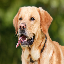

In [37]:

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
# This is test img
# first arg is the path
# img is 64x64 dims this is what v hv used in training so wee need to use exactly the same dims
# here also
test_image

In [38]:

test_image = image.img_to_array(test_image)

In [132]:
test_image

array([[[ 54.,  58.,   7.],
        [ 58.,  63.,   9.],
        [ 64.,  67.,  10.],
        ...,
        [136., 144.,  71.],
        [140., 150.,  77.],
        [139., 149.,  78.]],

       [[ 48.,  54.,   6.],
        [ 51.,  58.,   7.],
        [ 58.,  63.,   9.],
        ...,
        [129., 137.,  64.],
        [139., 149.,  78.],
        [141., 151.,  80.]],

       [[ 48.,  56.,   7.],
        [ 48.,  56.,   7.],
        [ 54.,  61.,  10.],
        ...,
        [123., 130.,  63.],
        [136., 145.,  80.],
        [140., 149.,  82.]],

       ...,

       [[ 46.,  55.,  12.],
        [ 42.,  50.,   9.],
        [ 38.,  49.,   9.],
        ...,
        [239., 205., 170.],
        [235., 209., 186.],
        [229., 202., 173.]],

       [[ 50.,  57.,  15.],
        [ 42.,  50.,   9.],
        [ 44.,  52.,  11.],
        ...,
        [234., 200., 162.],
        [236., 206., 178.],
        [234., 203., 174.]],

       [[ 53.,  59.,  13.],
        [ 43.,  51.,  10.],
        [ 49.,  

In [77]:
os.chdir("C:\\Users\\Vikas Bhardwaj")

In [39]:
test_image = np.expand_dims(test_image, axis = 0)

In [40]:
test_image

array([[[[ 54.,  58.,   7.],
         [ 58.,  63.,   9.],
         [ 64.,  67.,  10.],
         ...,
         [136., 144.,  71.],
         [140., 150.,  77.],
         [139., 149.,  78.]],

        [[ 48.,  54.,   6.],
         [ 51.,  58.,   7.],
         [ 58.,  63.,   9.],
         ...,
         [129., 137.,  64.],
         [139., 149.,  78.],
         [141., 151.,  80.]],

        [[ 48.,  56.,   7.],
         [ 48.,  56.,   7.],
         [ 54.,  61.,  10.],
         ...,
         [123., 130.,  63.],
         [136., 145.,  80.],
         [140., 149.,  82.]],

        ...,

        [[ 46.,  55.,  12.],
         [ 42.,  50.,   9.],
         [ 38.,  49.,   9.],
         ...,
         [239., 205., 170.],
         [235., 209., 186.],
         [229., 202., 173.]],

        [[ 50.,  57.,  15.],
         [ 42.,  50.,   9.],
         [ 44.,  52.,  11.],
         ...,
         [234., 200., 162.],
         [236., 206., 178.],
         [234., 203., 174.]],

        [[ 53.,  59.,  13.],
       

In [ ]:
'C:\\Users\\Vikas Bhardwaj\\Desktop\\DATA SCIENCE\\Datasets\\Datasets\\cnn_imgs_dataset'

In [41]:

result = classifier.predict(test_image)


In [42]:
result

array([[1.]], dtype=float32)

In [46]:
print(train_set.class_indices)

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'




{'cats': 0, 'dogs': 1}


In [48]:
test_image = image.load_img('single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


# Build fine tuned VGG16 model

In [143]:
vgg16_model=keras.applications.vgg16.VGG16()

In [144]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [145]:
type(vgg16_model)

keras.engine.training.Model

In [146]:
classifier=Sequential()

In [147]:
 for layer in vgg16_model.layers[:,-1]:
    classifier.add(layer)

In [148]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [164]:
classifier.layers.pop()

In [165]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [178]:

# last_layer=vgg16_model.get_layer('fc2').output
# out=classifier.add(Dense(output_dim=1,activation='sigmoid',name='output')(last_layer)



classifier.add(Dense(128, activation='relu')(classifier.layers[-2].output).classifier.layers[-1].output)


AttributeError: Layer predictions has multiple inbound nodes, hence the notion of "layer output" is ill-defined. Use `get_output_at(node_index)` instead.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [168]:
for layer in classifier.layers:
    layer.trainable=False
   

In [169]:
classifier.add(Dense(2,activation='softmax'))

In [170]:
 classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [171]:
# classifier.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=["accuracy"])


In [173]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [87]:
classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,#samples_per_epoch = 8000,
                         nb_epoch = 5, # nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 2000)#nb_val_samples = 2000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=250, epochs=5, validation_steps=2000)`
  """


Epoch 1/5


ValueError: Error when checking input: expected input_3 to have shape (224, 224, 3) but got array with shape (64, 64, 3)